# **A. Install imbalanced-learn**

In [3]:
! pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


# **B. Read data**

In [4]:
import pandas as pd

df = pd.read_csv('C://data/hcv_classification.csv',index_col=False)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


In [5]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

# **C. Class distribution**

In [6]:
activity_count = y.value_counts()
activity_count

active      412
inactive    166
Name: Activity, dtype: int64

<AxesSubplot:ylabel='Activity'>

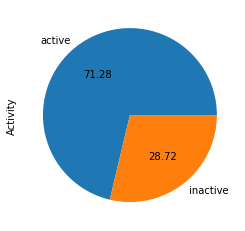

In [7]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7fac5b0aa790>,
 [Text(-0.6818247054992795, 0.8632004813314349, 'active'),
  Text(0.6818247054992798, -0.8632004813314348, 'inactive')],
 [Text(-0.3719043848177888, 0.4708366261807826, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

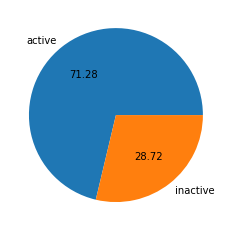

In [ ]:
# Show pie plot (Approach 2)
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=activity_count.index)

In [8]:
activity_count.index

Index(['active', 'inactive'], dtype='object')

# **D. Data splitting**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((462, 881), (462,), (116, 881), (116,))

<AxesSubplot:ylabel='Activity'>

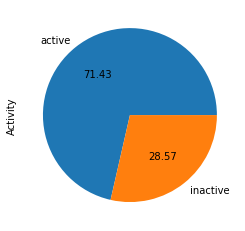

In [11]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [12]:
y_train.value_counts()

active      330
inactive    132
Name: Activity, dtype: int64

# **E. Class balancing**

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

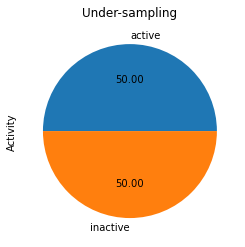

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [15]:
# Class distribution
y_train_rus.value_counts()

active      132
inactive    132
Name: Activity, dtype: int64

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



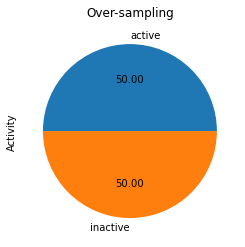

In [16]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [17]:
y_train_ros.value_counts()

active      330
inactive    330
Name: Activity, dtype: int64

---

# **F. Model building with/without class balancing**

### **1. Model building with undersampled balanced class**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [ ]:
# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)

In [ ]:
# Display model performance results
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_test,0.712435


### **2. Model building with oversampled balanced class**

In [ ]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [ ]:
# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

In [ ]:
y_test_pred = model.predict(X_test)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

In [ ]:
# Display model performance results
df_labels = pd.Series(['MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_test,0.744225
